# Image Processing

The purpose of this homework is to use data analysis workflows for image processing. 

For those of you interested in understanding the code, the notebook uses the [numpy](http://numpy.org) library to manage data, the [matplotlib](https://matplotlib.org) library to visualize the results, and an image processing library called [scikit-image](http://scikit-image.org) for the segmenting, smoothing, and edge detection methods.

You will be running three different workflows in this notebook:

1. Smooth then Segment
2. Segment then Canny

First, download the data for this assignment.

In [6]:
!wget 'https://github.com/pointandclickinterface/INF549/raw/master/Homework%20Assignments/Assignment4_ImageProcessing_SocialNetworkAnalysis/Image_Processing/longjump.jpg'
!wget 'https://github.com/pointandclickinterface/INF549/raw/master/Homework%20Assignments/Assignment4_ImageProcessing_SocialNetworkAnalysis/Image_Processing/rocks.jpg'

--2021-10-07 17:40:11--  https://github.com/pointandclickinterface/INF549/raw/master/Homework%20Assignments/Assignment4_ImageProcessing_SocialNetworkAnalysis/Image_Processing/longjump.jpg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pointandclickinterface/INF549/master/Homework%20Assignments/Assignment4_ImageProcessing_SocialNetworkAnalysis/Image_Processing/longjump.jpg [following]
--2021-10-07 17:40:11--  https://raw.githubusercontent.com/pointandclickinterface/INF549/master/Homework%20Assignments/Assignment4_ImageProcessing_SocialNetworkAnalysis/Image_Processing/longjump.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awa

## 1.Smooth then Segment

This section will allow you to smooth and segment images.

The following cell contains some predefined functions to implement [watershed segmentation](https://en.wikipedia.org/wiki/Watershed_(image_processing) and smoothing by [Gaussian filters](https://en.wikipedia.org/wiki/Gaussian_blur). Please make sure you have run this cell before you run other cells.

### Preliminary Setup

The following cell contains some predefined functions to smooth image and segment it. When you run the cell, the definitions of these functions will be incorporated into the notebook.

In [36]:
from scipy import ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature,io,color
from skimage.morphology import watershed
from skimage.filters import threshold_otsu,threshold_yen,gaussian


def loadIMG():
    filename=str(input("Please input the image filename:"))
    img = io.imread("rocks.jpg")
    return img

def Smooth(img):
    smoothedImg = gaussian(img,sigma=2.5,multichannel=True)
    return smoothedImg

def displaySmooth(img):
    plt.clf()
    smoothedImg=Smooth(img)
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4),sharex=True,\
                                  sharey=True)
    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title('Original Image', fontsize=10)
    ax2.imshow(smoothedImg, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title('Smoothed Image', fontsize=10)
    fig.tight_layout()
    plt.show() 
    
def Segment(img):
    if len(img.shape)>2:
        img = color.rgb2gray(img)
    
    thresh = threshold_yen(img)
    segmentation = img > thresh
    return segmentation

def displaySegment(img):
    plt.clf()
    segmentation=Segment(img)
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4),sharex=True,\
                                  sharey=True)
    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title('Original Image', fontsize=10)
    ax2.imshow(segmentation, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title('Segmented Image', fontsize=10)
    fig.tight_layout()
    plt.show() 

### Smooth an Image

Run the following cell and input the filename of one of the images.

Please input the image filename:rocks.jpg


<Figure size 432x288 with 0 Axes>

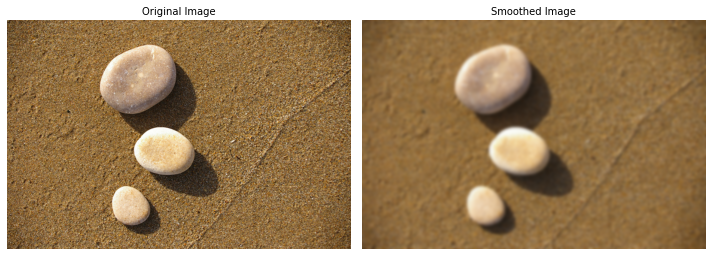

In [37]:
img=loadIMG()
displaySmooth(img)

### Segment an Image

Run the following cell to segment the images

<Figure size 432x288 with 0 Axes>

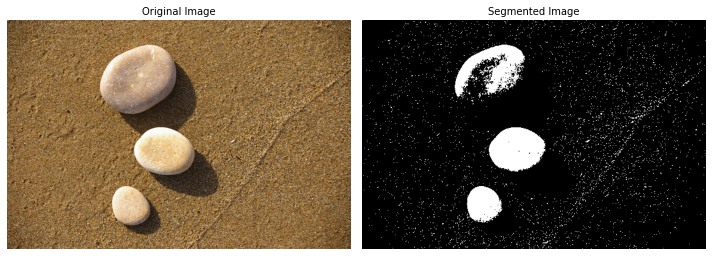

In [38]:
displaySegment(img)

### Combining Smoothing and Segmenting

The cell below defines a function to smooth and then segment an image. It will output the original image, the segmented image, and the image after smoothing and then segmenting it.

In [39]:
def plotSmoothThenSegment(img1):
    img2=Smooth(img1)
    img3=Segment(img2)
    fig, (ax1,ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4),sharex=True,\
                                      sharey=True)
    ax1.imshow(img1, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title('Original Image', fontsize=10)
    ax2.imshow(img2, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title('Smoothed Image', fontsize=10)
    ax3.imshow(img3, cmap=plt.cm.gray)
    ax3.axis('off')
    ax3.set_title('Smoothed Then Segmented Image', fontsize=10)
    fig.tight_layout()
    plt.show() 

Running the following cell will execute that function plotSmoothThenSegment() using the image.

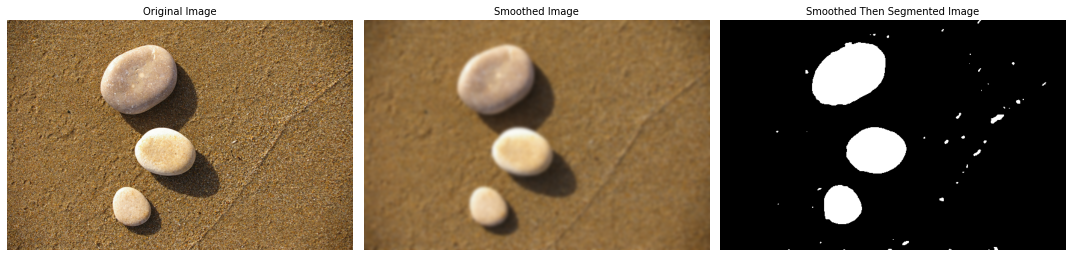

In [40]:
plotSmoothThenSegment(img)

## 2.Segment then Canny

This section will allow you to segment images and do edge detection for images.

For those of you interested in the code, the segmentation algorithm is threshold Yen and the edge detection algorithm is called Canny edge detection.

The following cell contains some predefined functions to implement segmentation and edge detection. Please make sure you have run this cell before you run the next cells in this notebook.





In [48]:
def loadIMG():
    filename=input("Please input the image filename:")
    sigma="0","1","2"
    img = io.imread(filename)
    return img,sigma

def CannyEdge(img,sigma):
    plt.clf()
    if len(img.shape)!=2:
        img1 = color.rgb2gray(img)
    edges1 = feature.canny(img1, sigma=float(sigma[0]))
    edges2 = feature.canny(img1, sigma=float(sigma[1]))
    edges3 = feature.canny(img1, sigma=float(sigma[2]))
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4, figsize=(12, 3),sharex=True, sharey=True)
    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title('Original Image', fontsize=10)
    ax2.imshow(edges1, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title('Canny Edge Image, $\sigma=$'+sigma[0], fontsize=10)
    ax3.imshow(edges2, cmap=plt.cm.gray)
    ax3.axis('off')
    ax3.set_title('Canny Edge Image, $\sigma=$'+sigma[1], fontsize=10)
    ax4.imshow(edges3, cmap=plt.cm.gray)
    ax4.axis('off')
    ax4.set_title('Canny Edge Image, $\sigma=$'+sigma[2], fontsize=10)
    fig.tight_layout()
    plt.savefig('Edge Detection.png',dpi=300) 
    plt.show()  


Below: Load the image with again-

In [49]:
img,sigma=loadIMG()

Please input the image filename:rocks.jpg


### Canny Edge Detection with Different Parameters 

The following cell will detect the edges of a given image. Sigma is the standard deviation for the Gaussian filter in Canny edge detection.

<Figure size 432x288 with 0 Axes>

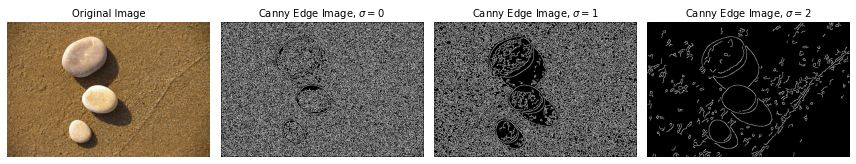

In [50]:
CannyEdge(img, sigma)

### Combining Segmenting and Edge Detection

The cell below defines a function to segment an image and then detect its edges. It will output the original image, the image with edge detection, and the image after segmenting and then detecting its edges.

In [51]:
def loadIMG():
    filename=input("Please input the image filename:")
    img = io.imread(filename)
    return img

def CannyEdge(img,sigma):
    if len(img.shape)!=2:
        img = color.rgb2gray(img)
    edges = feature.canny(img, sigma)
    return edges

def displaySegmentThenCanny(img,sigma):
    plt.clf()
    segmentation=Segment(img)
    edges=CannyEdge(segmentation,sigma)
    fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4),sharex=True, \
                                      sharey=True)
    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title('Original Image', fontsize=10)
    ax2.imshow(segmentation, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title('Segmented Image', fontsize=10)
    ax3.imshow(edges, cmap=plt.cm.gray)
    ax3.axis('off')
    ax3.set_title('Segmented then Edged Image, $\sigma=$'+str(sigma), fontsize=10)
    fig.tight_layout()
    plt.savefig('Segmenting and Edge Detection.png',dpi=300) 
    plt.show() 

Running the following cell will execute that function displaySegmentThenCanny() using the image.

<Figure size 432x288 with 0 Axes>

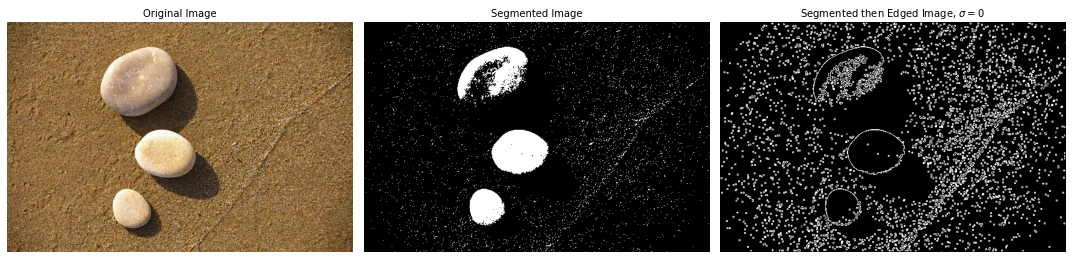

<Figure size 432x288 with 0 Axes>

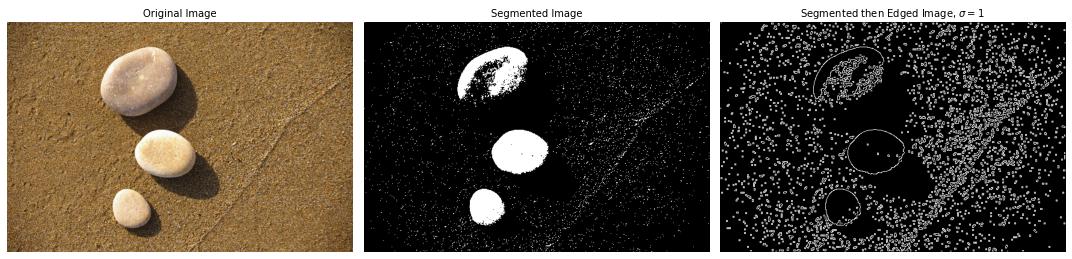

<Figure size 432x288 with 0 Axes>

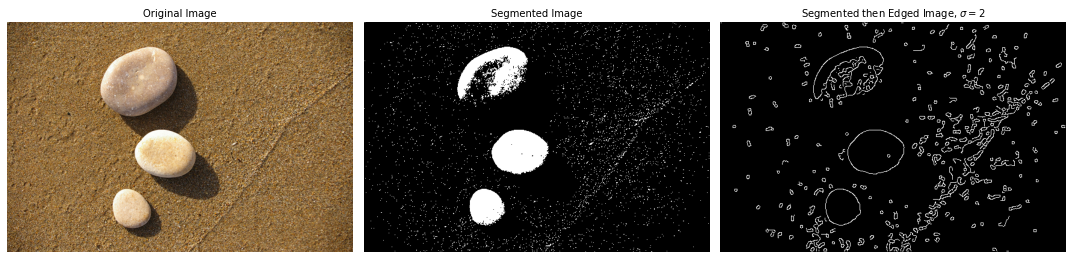

In [52]:
sigma0, sigma1, sigma2=0,1,2
displaySegmentThenCanny(img,sigma0)
displaySegmentThenCanny(img,sigma1)
displaySegmentThenCanny(img,sigma2)